In [1]:
!pip install fastai -Uqq

In [9]:
from fastai.tabular.all import *
from scipy.stats import rankdata

In [3]:
target = pd.read_csv('592.csv')

In [14]:
target.tm = rankdata(target.tm)/len(target)

In [16]:
wt = pd.read_csv('all_enzymes_wt_feature.csv')
mutant = pd.read_csv('all_enzymes_mutant_feature.csv')

In [17]:
ids = mutant.query('split == "test"').seq_id

In [18]:
diff = (mutant.iloc[:,-1280:] - wt.iloc[:,1:])*1000

In [19]:
diff['seq_id'] = mutant.seq_id

In [20]:
diff

,0,1,2,3,4,5,6,7,8,9,...,1271,1272,1273,1274,1275,1276,1277,1278,1279,seq_id
0,-0.191239,1.191798,-0.177326,-0.153682,0.093750,0.406907,0.138367,1.482240,0.479720,0.469026,...,1.553307,-0.742600,0.897780,0.556189,-0.250849,1.379763,1.330386,-0.599055,-1.256550,20930
1,-0.644544,0.746815,-0.512135,-0.968913,0.747375,0.619957,0.144227,-0.508080,-0.262190,-0.817679,...,0.243897,0.174130,-0.012257,0.276052,-0.933997,0.910628,-0.057254,-0.114180,0.457850,20926
2,-0.608955,-0.218321,0.252607,-1.422418,-0.443235,-0.122010,0.241703,-1.032180,-0.537918,-1.167498,...,-0.470957,2.460484,-0.103303,0.303198,0.804251,1.327223,0.153006,-0.117093,-0.152830,20925
3,1.166183,0.478211,-0.568844,1.001133,0.841398,-1.159250,0.287874,0.472230,0.746170,-0.142194,...,1.014205,-0.217940,-1.723797,0.292148,-0.032902,1.009711,0.773888,-0.106348,-0.253720,20924
4,-0.072722,-0.188202,-0.187546,0.417306,0.937887,-0.591430,0.943890,-0.003670,0.172102,0.727136,...,-0.440610,-0.802950,0.953525,0.288082,1.529792,-1.331988,-0.852684,-1.139663,-0.752086,20932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6586,-2.031530,-2.105862,-6.158473,-3.934317,-0.291146,6.268697,6.070630,-3.949364,-5.946946,-0.712840,...,-0.498990,2.625542,-5.606767,2.050934,1.105010,-1.039590,0.666650,-4.178310,8.908040,13940
6587,-4.200990,8.117259,-7.123729,0.816603,8.978054,-2.443714,-7.363370,6.682533,-7.334356,-2.272790,...,-1.952790,7.184247,-5.884957,-5.678126,10.562990,2.028086,-7.563590,-0.962676,-0.421810,13909
6588,1.137260,8.912401,-1.759052,3.677998,14.172376,-4.475134,6.080820,6.357445,-1.597241,3.122490,...,-1.951470,-0.743852,2.275107,1.158148,5.492750,7.071930,-11.519740,5.145400,2.111010,13586
6589,1.187262,14.530448,4.735697,0.900713,12.448090,-8.456100,5.468345,-5.192620,-1.754666,-8.892257,...,-5.900080,3.654750,-9.954209,2.859294,1.586750,3.097600,-15.714880,16.521370,1.555324,4618


In [21]:
train = diff.merge(ids)

In [97]:
target2 = pd.read_csv('rosetta_score.csv')

In [100]:
target22 = target2[['source_df_id','scores']].rename(columns={'source_df_id':'seq_id'})

In [101]:
target22

,seq_id,scores
0,31390,621.184323
1,31391,621.254853
2,31392,613.820542
3,31393,617.874844
4,31394,610.671530
...,...,...
2408,33798,619.827228
2409,33799,620.298394
2410,33800,619.675224
2411,33801,621.747913


In [22]:
df = train.merge(target)

In [23]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,1272,1273,1274,1275,1276,1277,1278,1279,seq_id,tm
0,1.173727,1.986922,3.88930,-5.77533,-0.120917,-0.774952,-0.058650,1.310255,-1.739824,-1.911720,...,-1.95113,3.199333,0.208482,1.801286,4.59305,1.910410,-1.586593,-2.113920,32686,0.038541
1,2.699796,1.391132,0.39794,1.21653,0.938377,-0.401762,1.402008,-4.088855,3.417369,0.872620,...,-1.24897,4.114946,-0.390213,-1.319539,-2.34948,4.647760,-2.049131,-5.280740,32895,0.370493
2,-3.967587,-2.624838,0.60183,0.11862,0.818730,2.369650,-2.785084,0.006631,0.794678,-1.092325,...,0.30413,0.675049,-0.820178,-0.349257,0.54798,-0.624150,0.018247,-4.200280,32918,0.999171
3,-1.471850,1.296106,-0.52590,3.21821,-3.227500,4.991939,-3.033700,2.709940,-2.335937,0.059445,...,0.01617,0.586972,0.623848,2.015590,-0.94455,-5.781720,2.024912,-6.007875,32919,0.992540
4,-4.251376,-0.354688,0.02548,4.69519,-1.879560,4.649894,-1.840800,-2.343961,-0.658314,1.161240,...,3.42889,5.937809,-3.130205,1.473240,-3.51797,-0.139164,0.519030,-3.571210,32920,0.910899


In [24]:
splits = RandomSplitter(valid_pct=0.2)(range_of(df))

In [25]:
to = TabularPandas(df, procs=[Normalize],
                   # cat_names = None,
                   cont_names = [str(i) for i in range(1280)],
                   y_names='tm',
                   splits=splits)

In [26]:
dls = to.dataloaders(bs=64)

In [27]:
dls.show_batch()

In [28]:
learn = tabular_learner(dls)

SuggestedLRs(valley=0.0006918309954926372)

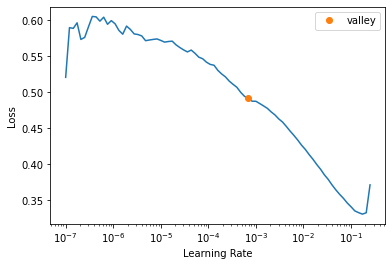

In [29]:
learn.lr_find()

In [30]:
learn.fit_one_cycle(50,0.0007, cbs=SaveModelCallback())

epoch,train_loss,valid_loss,time
0,0.476974,0.451407,00:00
1,0.396312,0.355411,00:00
2,0.345076,0.303930,00:00
3,0.304539,0.273438,00:00
4,0.269263,0.271737,00:00
5,0.237700,0.210872,00:00
6,0.204464,0.175003,00:00
7,0.167133,0.117826,00:00
8,0.128015,0.080713,00:00
9,0.097698,0.063266,00:00


Better model found at epoch 0 with valid_loss value: 0.4514072835445404.
Better model found at epoch 1 with valid_loss value: 0.35541069507598877.
Better model found at epoch 2 with valid_loss value: 0.30392971634864807.
Better model found at epoch 3 with valid_loss value: 0.2734380066394806.
Better model found at epoch 4 with valid_loss value: 0.27173712849617004.
Better model found at epoch 5 with valid_loss value: 0.21087206900119781.
Better model found at epoch 6 with valid_loss value: 0.1750032752752304.
Better model found at epoch 7 with valid_loss value: 0.11782575398683548.
Better model found at epoch 8 with valid_loss value: 0.08071251213550568.
Better model found at epoch 9 with valid_loss value: 0.06326577812433243.
Better model found at epoch 11 with valid_loss value: 0.06188280135393143.
Better model found at epoch 12 with valid_loss value: 0.05005446821451187.
Better model found at epoch 13 with valid_loss value: 0.04557959735393524.
Better model found at epoch 14 with va

In [132]:
del learn

In [31]:
test_df = df.copy()
test_df.drop(['tm'], axis=1, inplace=True)
dl = learn.dls.test_dl(test_df)
preds,targs = learn.get_preds(dl=dl)
target['tm'] = preds.squeeze().numpy()
target.to_csv('submission.csv', index=False)

In [32]:
target['tm'] = rankdata(target['tm'])

In [33]:
target.to_csv('submission.csv', index=False)